# _Tasca 5, Sprint 4:_ *Data Visualization* 

## Exercise 1

Download the "Airlines Delay: Airline on-time statistics and delay causes" data set and upload it to a Dataframe pandas. Explore the data it contains, and keep only the columns you consider relevant.

In [1]:
# importing libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

pd.set_option('display.max_columns', None)

In [2]:
pd.options.display.float_format = '{:.0f}'.format
filename = '../Data/DelayedFlights.csv'

data = pd.read_csv(filename, delimiter=',')

print('Shape of the data is', data.shape)
data.describe()

Shape of the data is (1936758, 30)


,Unnamed: 0,Year,Month,DayofMonth,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,FlightNum,ActualElapsedTime,CRSElapsedTime,AirTime,ArrDelay,DepDelay,Distance,TaxiIn,TaxiOut,Cancelled,Diverted,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay
count,1936758,1936758,1936758,1936758,1936758,1936758,1936758,1929648,1936758,1936758,1928371,1936560,1928371,1928371,1936758,1936758,1929648,1936303,1936758,1936758,1247488,1247488,1247488,1247488,1247488
mean,3341651,2008,6,16,4,1519,1467,1610,1634,2184,133,134,108,42,43,766,7,18,0,0,19,4,15,0,25
std,2066065,0,3,9,2,450,425,548,465,1945,72,71,69,57,53,574,5,14,0,0,44,21,34,2,42
min,0,2008,1,1,1,1,0,1,0,1,14,-25,0,-109,6,11,0,0,0,0,0,0,0,0,0
25%,1517452,2008,3,8,2,1203,1135,1316,1325,610,80,82,58,9,12,338,4,10,0,0,0,0,0,0,0
50%,3242558,2008,6,16,4,1545,1510,1715,1705,1543,116,116,90,24,24,606,6,14,0,0,2,0,2,0,8
75%,4972467,2008,9,23,6,1900,1815,2030,2014,3422,165,165,137,56,53,998,8,21,0,0,21,0,15,0,33
max,7009727,2008,12,31,7,2400,2359,2400,2400,9742,1114,660,1091,2461,2467,4962,240,422,1,1,2436,1352,1357,392,1316


### **_Data Exploration_**

The data has 1,936,758 rows and 30 columns. This is a data for Airlines delay statistics from the year 2008, and includes columns such as *departure time*, *arrival time*, *flight distance*, if the flights were *diverted and/or cancelled* and so on. Some of the columns may not be useful for the analysis concerning flight delays. Let's first see what are all the columns and the datatype for each of them. The built-in function of pandas called "*data.info*" will give us this information. 

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1936758 entries, 0 to 1936757
Data columns (total 30 columns):
 #   Column             Dtype  
---  ------             -----  
 0   Unnamed: 0         int64  
 1   Year               int64  
 2   Month              int64  
 3   DayofMonth         int64  
 4   DayOfWeek          int64  
 5   DepTime            float64
 6   CRSDepTime         int64  
 7   ArrTime            float64
 8   CRSArrTime         int64  
 9   UniqueCarrier      object 
 10  FlightNum          int64  
 11  TailNum            object 
 12  ActualElapsedTime  float64
 13  CRSElapsedTime     float64
 14  AirTime            float64
 15  ArrDelay           float64
 16  DepDelay           float64
 17  Origin             object 
 18  Dest               object 
 19  Distance           int64  
 20  TaxiIn             float64
 21  TaxiOut            float64
 22  Cancelled          int64  
 23  CancellationCode   object 
 24  Diverted           int64  
 25  CarrierDelay      

#### Correlation matrix

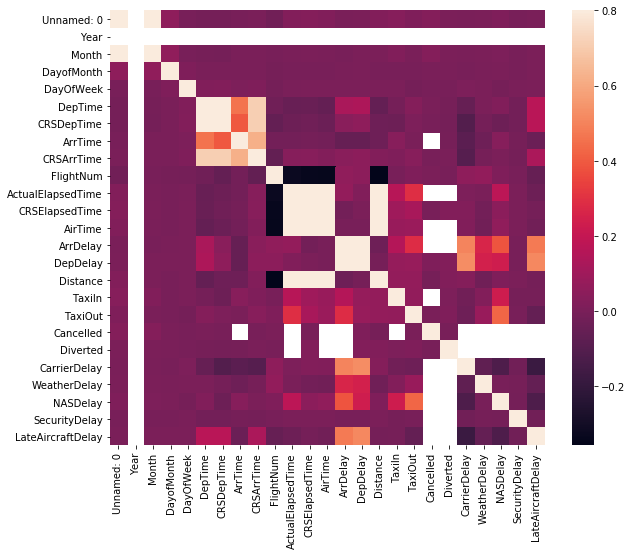

In [4]:
corrmatrix = data.corr()
f, ax = plt.subplots(figsize=(10, 8))
sns.heatmap(corrmatrix, vmax=.8, square=True)
plt.show()

    Through the correlation matrix we can see how some of the 29 variables in the dataset show multicollinearity,  in other words, can be linearly predicted from the others.

Now, let's add a column called *'DepDate'* with Year-Month-Day format. This way I can remove the columns of 'Year' and 'DayofMonth'.

In [5]:
# 'Departure_date' with Year-Month-Day format
data['DepDate'] = pd.to_datetime(data.Year * 10000 + 
                                 data.Month * 100 +
                                 data.DayofMonth,
                                 format='%Y%m%d')

#Plotting to check the columns to be deleted

avgLate = np.sum(data['ArrDelay'])/len(data['ArrDelay'])
attributes = ['DayofMonth', 'DepTime', 'ArrTime']
for i,pred in enumerate(attributes):
    plt.figure(i, figsize=(20, 8))
    group = data.groupby([pred], as_index=False).aggregate(np.mean)[[pred, 'ArrDelay']]
    group.sort_values(by=pred, inplace=True)    
    group.plot.bar(x=pred, y='ArrDelay')
    plt.axhline(y=avgLate, label='Average')
    plt.ylabel('Percent of Flights that Arrive Late')
    plt.title(pred)
    plt.legend().remove()

### **_Removal of columns_**

Now, Considering that the idea is to have an analysis for flight delays, the following columns can be deleted.  

Also, the correlation matrix above indicates that the columns listed above, have no significant correlation to arrival delay. 

    Unnamed: 0 - empty, just an index column
    Year - converted to date
    DayofMonth - converted to date
    DepTime - DepDelay is more useful
    ArrTime, CRSArrTime - ArrDelay is more useful
    FlightNum - carrier informations is more
    TailNum - a unique value, not useful, besides carrier information is more useful  
    ActualElapsedTime - it is a flight duration in minutes, does not impact flight delays. I will use flight distance instead of this to see the impact on flight delays, which is more robust.
    CRSElapsedTime - scheduled flight duration, again distance is a more robust parameter
    TaxiIn, TaxiOut - Taxi time before departure and after arrival, do not appear to impact significantly to flight delays in general. Also, 'AirTime' seems a slightly more useful factor to understand flight delays. 
    


In [6]:
drop_columns = ['Unnamed: 0', 'Year', 'DayofMonth', 
                'DepTime', 'ArrTime', 'CRSArrTime',
                'FlightNum', 'TailNum', 'ActualElapsedTime', 
                'CRSElapsedTime', 'TaxiIn', 'TaxiOut']

data.drop(drop_columns, axis=1, inplace=True)

#### Correlation matrix

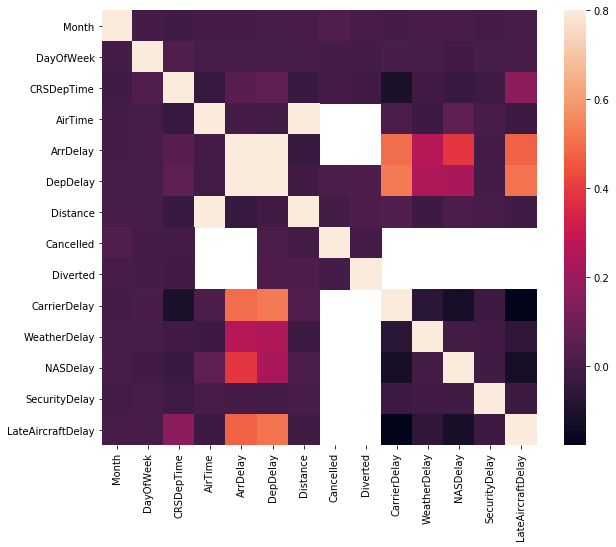

In [7]:
corrmatrix = data.corr()
f, ax = plt.subplots(figsize=(10, 8))
sns.heatmap(corrmatrix, vmax=.8, square=True)
plt.show()

In [8]:
print('Shape of the reduced data is', data.shape)
data.head(4)

Shape of the reduced data is (1936758, 19)


,Month,DayOfWeek,CRSDepTime,UniqueCarrier,AirTime,ArrDelay,DepDelay,Origin,Dest,Distance,Cancelled,CancellationCode,Diverted,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay,DepDate
0,1,4,1955,WN,116,-14,8,IAD,TPA,810,0,N,0,nan,nan,nan,nan,nan,2008-01-03
1,1,4,735,WN,113,2,19,IAD,TPA,810,0,N,0,nan,nan,nan,nan,nan,2008-01-03
2,1,4,620,WN,76,14,8,IND,BWI,515,0,N,0,nan,nan,nan,nan,nan,2008-01-03
3,1,4,1755,WN,77,34,34,IND,BWI,515,0,N,0,2,0,0,0,32,2008-01-03


    After removing the columns that appear to be of no use, and adding a column for departure date, we have 18 columns in the dataset.

## Exercise 2

Make a complete report of the date set : 
     
     Summarize the columns of interest statistically
     Find how many missing data are per column
     Create new columns (average flight speed, whether late or not ...)
     Table of airlines with the most accumulated delays
     What are the longest flights? And the most delay? Etc.

In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1936758 entries, 0 to 1936757
Data columns (total 19 columns):
 #   Column             Dtype         
---  ------             -----         
 0   Month              int64         
 1   DayOfWeek          int64         
 2   CRSDepTime         int64         
 3   UniqueCarrier      object        
 4   AirTime            float64       
 5   ArrDelay           float64       
 6   DepDelay           float64       
 7   Origin             object        
 8   Dest               object        
 9   Distance           int64         
 10  Cancelled          int64         
 11  CancellationCode   object        
 12  Diverted           int64         
 13  CarrierDelay       float64       
 14  WeatherDelay       float64       
 15  NASDelay           float64       
 16  SecurityDelay      float64       
 17  LateAircraftDelay  float64       
 18  DepDate            datetime64[ns]
dtypes: datetime64[ns](1), float64(8), int64(6), object(4)
memory us

### **_Statistical summary of columns_**

I chose following columns where statistical summary may give useful information. 
    
    - AirTime, ArrDelay, DepDelay and Distance
    - CarrierDelay, WeatherDelay, NASDelay, SecurityDelay, LateAircraftDelay

In [10]:
col_of_interest = ['AirTime', 'ArrDelay', 'DepDelay', 'Distance', 'CarrierDelay', 'WeatherDelay', 'NASDelay', 'SecurityDelay', 'LateAircraftDelay']
data[col_of_interest].describe()

,AirTime,ArrDelay,DepDelay,Distance,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay
count,1928371,1928371,1936758,1936758,1247488,1247488,1247488,1247488,1247488
mean,108,42,43,766,19,4,15,0,25
std,69,57,53,574,44,21,34,2,42
min,0,-109,6,11,0,0,0,0,0
25%,58,9,12,338,0,0,0,0,0
50%,90,24,24,606,2,0,2,0,8
75%,137,56,53,998,21,0,15,0,33
max,1091,2461,2467,4962,2436,1352,1357,392,1316


The following observations can be made from this summary:

    - The average time for flights in air is 108 min and the maximum flight time is 1091 minutes. 
    - The average distance travelled is 766 miles, and the maximum distance is 4962 miles. 
    - The average arrival and departure delays are 42 and 43 minutes, respectively. 
    - The minimum times for departure delay is 6 minutes and for arrival delay is -109 minutes, the later is puzzling because it indicates that the flight arrived 109 minutes before scheduled arrival time. There are also other negative arrival delays in the column. 
    - From the remaining columns, we can see that the carrier delays (due to airline) is a major reason for delays (2436), while security related delays lead to least number of flight delays (392). 

#### Box plot

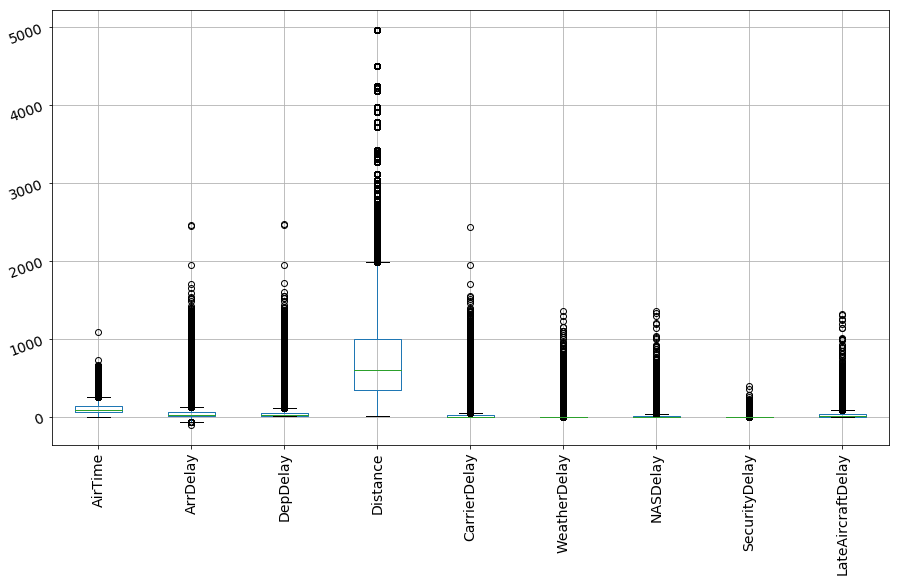

In [11]:
plt.figure(figsize=(15, 8))
#data.loc[:,col_of_interest].plot.box()
boxplot = data.boxplot(column=col_of_interest)
plt.tick_params(axis='x', which='major', rotation=90, labelsize=14)
plt.tick_params(axis='y', which='major', rotation=20, labelsize=14)

#### Pairplot

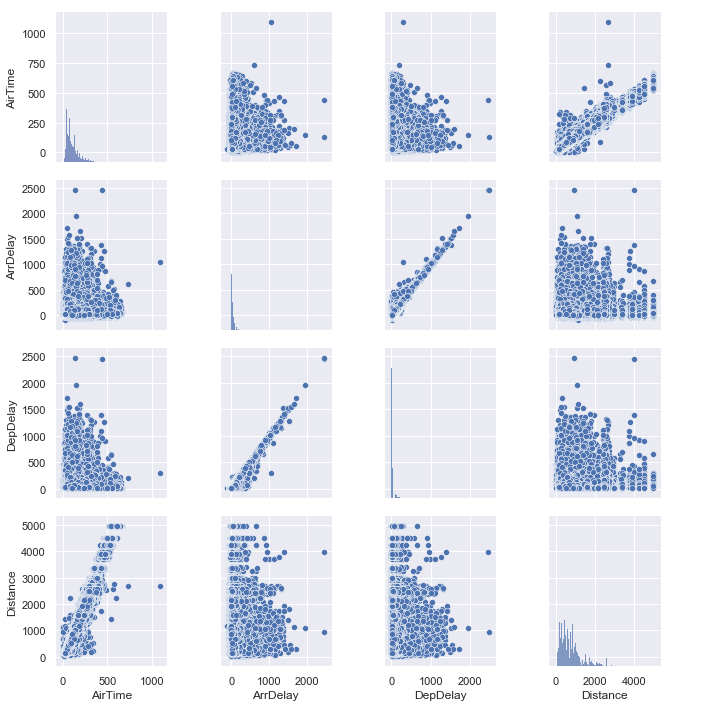

In [12]:
sns.set()
col_1 = ['AirTime', 'ArrDelay', 'DepDelay', 'Distance']
sns.pairplot(data[col_1])
plt.show()

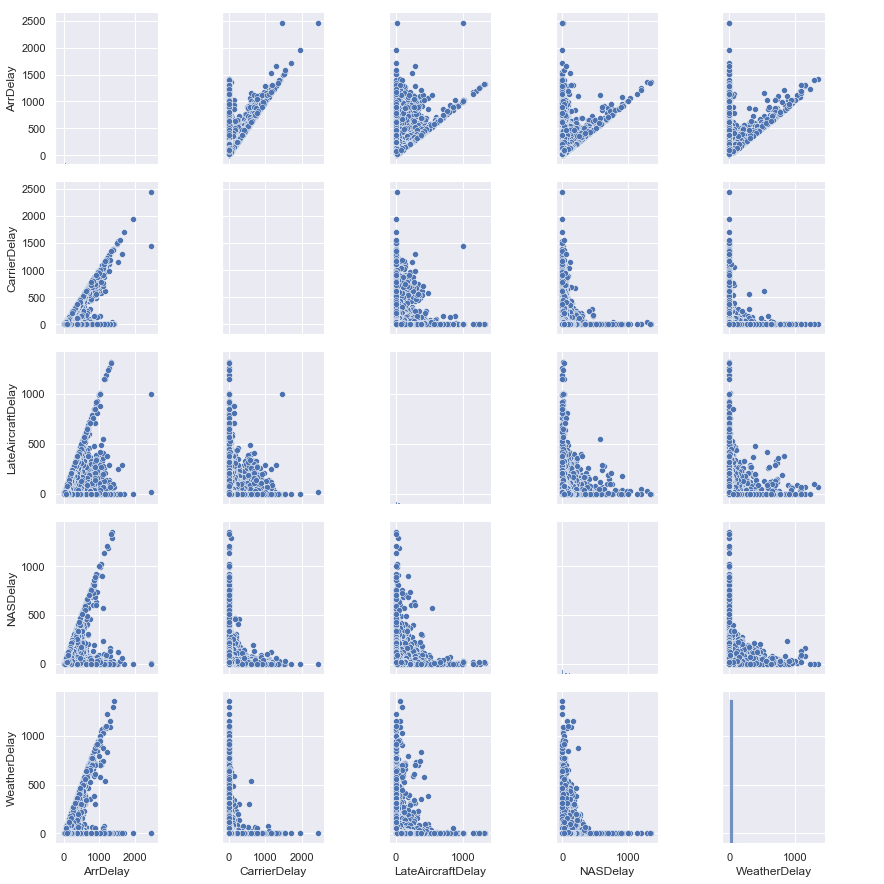

In [13]:
sns.set()
col_2 = ['ArrDelay', 'CarrierDelay', 'LateAircraftDelay', 'NASDelay', 'WeatherDelay']
sns.pairplot(data[col_2])
plt.show()

### **_Missing data per columns_**

To find out how many missing values are present in the data, the built-in function of pandas called "*isnull*" is used. Adding the number of times a missing data is detected over all the rows and columns, we can get total number of missing values. To get the missing values in each column, the detected values are summed once (only over columns).

In [14]:
nan_info=pd.DataFrame(data.dtypes).T.rename(index={0:'column type'})

nan_info=nan_info.append(pd.DataFrame(data.isnull().sum()).T.rename(index={0:'null values (nb)'}))

nan_info=nan_info.append(pd.DataFrame(data.isnull().sum()/data.shape[0]*100)
                         .T.rename(index={0:'null values (%)'}))
nan_info.T

,column type,null values (nb),null values (%)
Month,int64,0,0
DayOfWeek,int64,0,0
CRSDepTime,int64,0,0
UniqueCarrier,object,0,0
AirTime,float64,8387,0
ArrDelay,float64,8387,0
DepDelay,float64,0,0
Origin,object,0,0
Dest,object,0,0
Distance,int64,0,0


    - The columns of "AirTime" and "ArrDelay" has 8387 missing values. 
    - The columns of "CarrierDelay", "WeatherDelay", "NASDelay", "SecurityDelay" and "LateAircraftDelay" have      689270 missing values. 
    - Ideally, the missing values should be treated in a way that is appropriate for the kind of data we have. There are several ways to do it, but we will not do it at the moment. We may look at it in more detail in later parts of the course. 

#### Bar plot - NaN

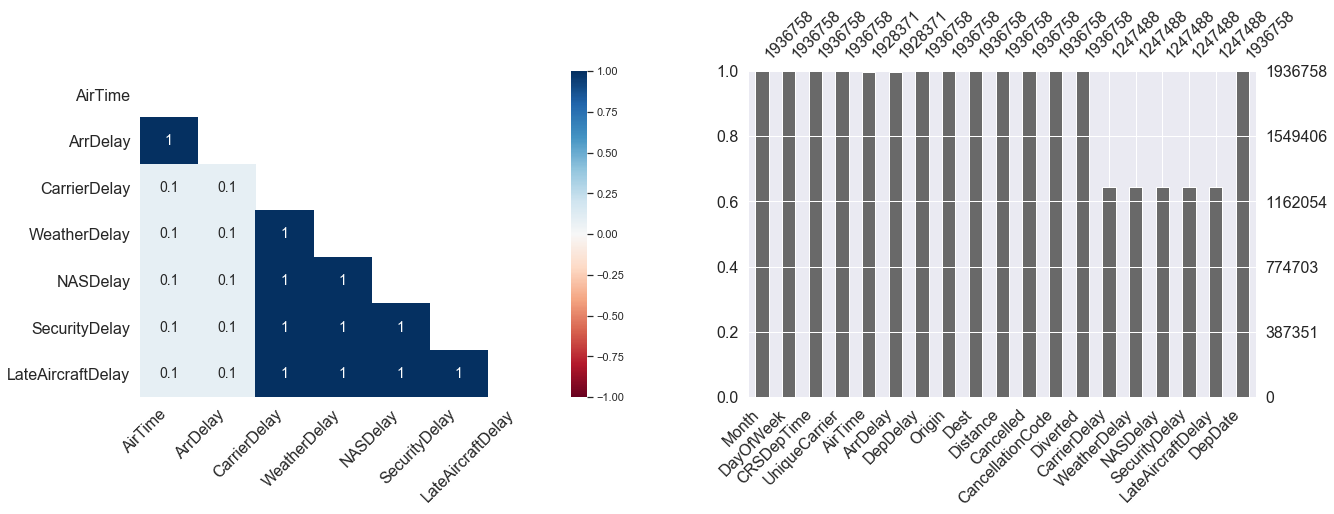

In [15]:
import missingno as msno 

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 6))

msno.heatmap(data, ax=ax1)
msno.bar(data, ax=ax2)

    These plots demonstrate the number of missing values present in the data for each variable.
    The values in the heatmap indicate how likely a variable having missing value affect another variable: 
       -1 = if one is present then the other is very likely to be missing.
        0 = no dependence between the occurrence of missing values between two variables.
        1 = if one is present then the other is very likely to be present.

### **_Creating New columns_**

Now, let's add some new columns to the data to give some extra information regarding flight delay statistics.

1. *AvgSpeed*: Average flight speed, calculated with distance divided by airtime (converted to miles/hour)
2. *Delay*: Delay status: on time (0), delayed (1). I have considered a flight to be **late only if the delay is more than 5 mins**. This is to keep a buffer time of 5 minutes, as well as to consider the possible error in the data for small delays.
3. *FLstatus*: Flight status, 
        - on time (0) if the flight has less than 5 min of arrival delay 
        - slightly delayed (1) if the flight has arrival delay is between 5 and 60 minutes
        - highly delayed (2) if the flight has arrival delay of more than 60 minutes
        - diverted (3) if the flight has been diverted
        - cancelled (4) if the flight has been cancelled
    

In [16]:
data['AvgSpeed'] = data['Distance'] / data['AirTime']*60 # the unit is miles/hour
#data.head(1)

#### Bar plot - Average speed

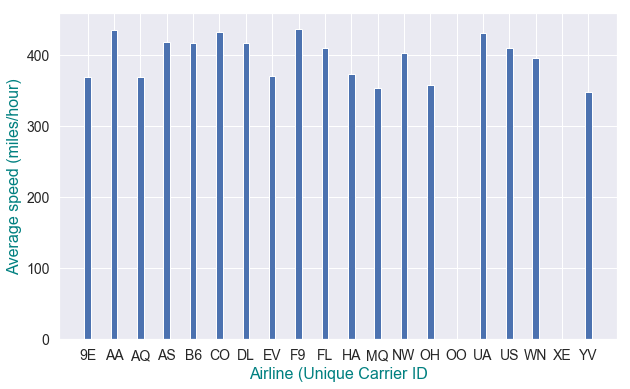

In [18]:
speed = data['AvgSpeed'].groupby(data['UniqueCarrier']).mean()
r1 = np.arange(len(speed))

plt.figure(figsize=(10, 6))

plt.bar(r1, speed, width=0.25)

plt.xlabel('Airline (Unique Carrier ID', fontsize=16, color='teal')
plt.ylabel('Average speed (miles/hour)', fontsize=16, color='teal')
plt.tick_params(axis='both', which='major', labelsize=14)
 
# Add xticks on the middle of the group bars
xtic = speed.index.values
plt.xticks([r for r in range(len(speed))], xtic)
plt.show()

In [19]:
r1

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19])

In [20]:
for dataset in data:
    data.loc[data['ArrDelay'] <= 5, 'Delay'] = 0
    data.loc[data['ArrDelay'] >= 5, 'Delay'] = 1

#### Countplot - Delay statistics

Text(0,0.5,'No. of Flights')

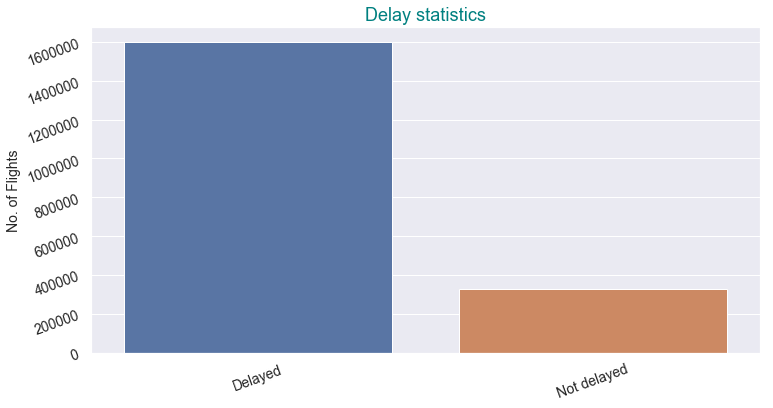

In [21]:
plt.figure(figsize=(12, 6))
sns.countplot('Delay', order=data['Delay'].value_counts().index, data=data)
plt.tick_params(axis='both', which='major', rotation=20, labelsize=14)
plt.title('Delay statistics', fontsize=18, color='teal')
plt.xticks([0, 1], ['Delayed', 'Not delayed'], fontsize=14)
plt.xlabel('')
plt.ylabel('No. of Flights', fontsize=14)

In [22]:
for dataset in data:
    data.loc[data['ArrDelay'] <= 5, 'FLstatus'] = 0
    data.loc[data['ArrDelay'] >= 5, 'FLstatus'] = 1
    data.loc[data['ArrDelay'] >= 60, 'FLstatus'] = 2
    data.loc[data['Diverted'] == 1, 'FLstatus'] = 3
    data.loc[data['Cancelled'] == 1, 'FLstatus'] = 4

In [23]:
print('Shape of the data with added columns is', data.shape)
data.head(4)

Shape of the data with added columns is (1936758, 22)


,Month,DayOfWeek,CRSDepTime,UniqueCarrier,AirTime,ArrDelay,DepDelay,Origin,Dest,Distance,Cancelled,CancellationCode,Diverted,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay,DepDate,AvgSpeed,Delay,FLstatus
0,1,4,1955,WN,116,-14,8,IAD,TPA,810,0,N,0,nan,nan,nan,nan,nan,2008-01-03,419,0,0
1,1,4,735,WN,113,2,19,IAD,TPA,810,0,N,0,nan,nan,nan,nan,nan,2008-01-03,430,0,0
2,1,4,620,WN,76,14,8,IND,BWI,515,0,N,0,nan,nan,nan,nan,nan,2008-01-03,407,1,1
3,1,4,1755,WN,77,34,34,IND,BWI,515,0,N,0,2,0,0,0,32,2008-01-03,401,1,1


#### Pie chart and Bar plot - Flight status

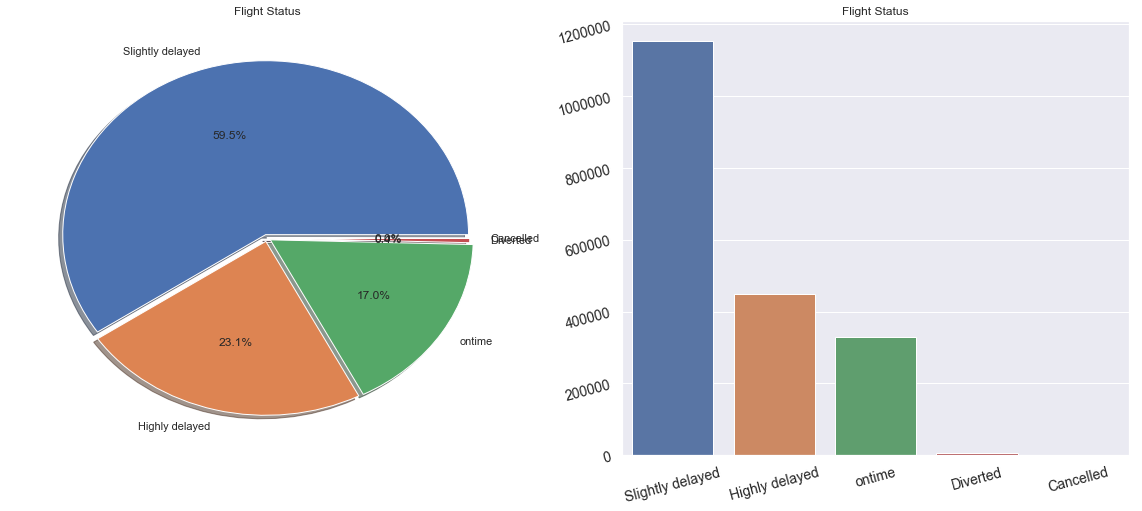

In [24]:
f,ax=plt.subplots(1,2,figsize=(20,8))
labels = ['Slightly delayed', 'Highly delayed', 'ontime','Diverted', 'Cancelled']
data['FLstatus'].value_counts().plot.pie(explode=[0.02,0.02,0.02,0,0],
                                         labels=labels,
                                         autopct='%1.1f%%',
                                         ax=ax[0],
                                         shadow=True)
ax[0].set_title('Flight Status')
ax[0].set_ylabel('')
sns.countplot('FLstatus',order = data['FLstatus'].value_counts().index, data=data,ax=ax[1])
ax[1].set_title('Flight Status')
ax[1].set_xticklabels(labels, fontsize=14)
ax[1].set_xlabel('')
ax[1].set_ylabel('')
plt.tick_params(axis='both', which='major', rotation = 15, labelsize=14)


    Now that we have converted "Diverted" and "Cancelled" to "FLstatus", we can delete these two columns. 

In [25]:
data = data.drop("Cancelled",1)
data = data.drop("Diverted",1)

In [26]:
print('Shape of the data is', data.shape)
data.head(4)

Shape of the data is (1936758, 20)


,Month,DayOfWeek,CRSDepTime,UniqueCarrier,AirTime,ArrDelay,DepDelay,Origin,Dest,Distance,CancellationCode,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay,DepDate,AvgSpeed,Delay,FLstatus
0,1,4,1955,WN,116,-14,8,IAD,TPA,810,N,nan,nan,nan,nan,nan,2008-01-03,419,0,0
1,1,4,735,WN,113,2,19,IAD,TPA,810,N,nan,nan,nan,nan,nan,2008-01-03,430,0,0
2,1,4,620,WN,76,14,8,IND,BWI,515,N,nan,nan,nan,nan,nan,2008-01-03,407,1,1
3,1,4,1755,WN,77,34,34,IND,BWI,515,N,2,0,0,0,32,2008-01-03,401,1,1


    Now, renaming the columns of 'UniqueCarrier' to 'Airline' and 'Dest' to 'Destination'. 

In [27]:
data.rename(columns={'UniqueCarrier': 'Airline'}, inplace=True)
data.rename(columns={'Dest': 'Destination'}, inplace=True)
data.head(2)

,Month,DayOfWeek,CRSDepTime,Airline,AirTime,ArrDelay,DepDelay,Origin,Destination,Distance,CancellationCode,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay,DepDate,AvgSpeed,Delay,FLstatus
0,1,4,1955,WN,116,-14,8,IAD,TPA,810,N,nan,nan,nan,nan,nan,2008-01-03,419,0,0
1,1,4,735,WN,113,2,19,IAD,TPA,810,N,nan,nan,nan,nan,nan,2008-01-03,430,0,0


In [28]:
print("Nb of airports: {}".format(len(data['Origin'].unique())))

Nb of airports: 303


#### Bar plot - Number of airports per airline

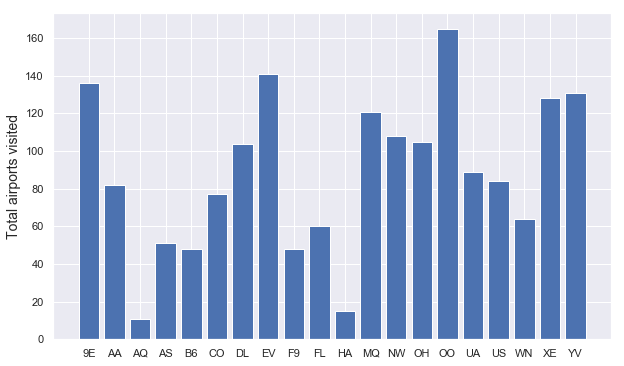

In [29]:
group_by_airport = data.groupby(['Airline','Destination'])
airports_vstd = group_by_airport.size().unstack()
airports_vstd.fillna(0, inplace = True)
airports_vstd[airports_vstd != 0] = 1
total_airports = airports_vstd.sum(axis = 1)

plt.figure(figsize=(10, 6))
r1 = np.arange(len(total_airports))
plt.bar(r1, total_airports)
xtic = total_airports.index.values
plt.xticks([r for r in range(len(total_airports))], xtic)
plt.ylabel('Total airports visited', fontsize=14)
plt.show()

###  **_Most accumulated delays_**

Table of airlines with the most accumulated delays. 
    
    0 - total number of not delayed flights 
    1 - total number of delayed flights 


In [30]:
group_by_airline = data.groupby(['Airline','Delay'])

In [31]:
count_delays_by_airline = group_by_airline.size().unstack()
count_delays_by_airline

Delay,0,1
Airline,,
9E,7622,43947
AA,28881,162029
AQ,153,591
AS,7395,31615
B6,9449,45476
CO,23313,76418
DL,19888,93840
EV,11061,70701
F9,4846,23378


#### Bar plot - Accumulated delays by airline

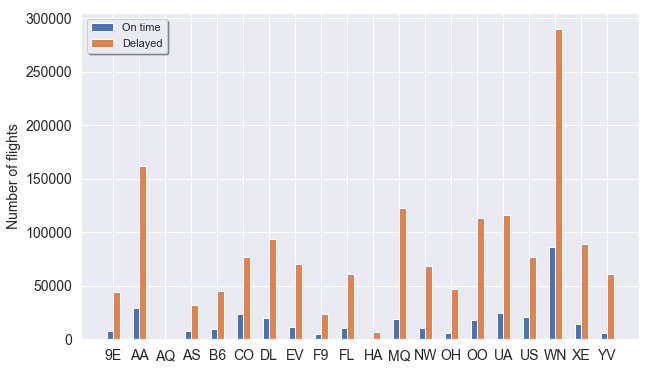

In [32]:
plt.figure(figsize=(10, 6))
barWidth = 0.25

r1 = np.arange(len(count_delays_by_airline))
plt.bar(r1, count_delays_by_airline[0], width=barWidth, edgecolor='white', label='On time')
plt.bar(r1+.25, count_delays_by_airline[1], width=barWidth, edgecolor='white', label='Delayed')
xtic = count_delays_by_airline.index.values
plt.xticks([r+barWidth/2 for r in range(len(total_airports))], xtic)
plt.ylabel('Total airports visited', fontsize=14)

plt.legend(loc='left',
           ncol=1,
           fancybox=True,
           shadow=True)
plt.ylabel('Number of flights', fontsize=14)
plt.tick_params(axis='both', which='major', labelsize=14)


### **_Longest flights_**

What are the longest flights?

    To check which are the longest flights in our data, let's use the "loc", which is a location identifier for    pandas dataframes. I have used "Distance" column as the criteria to find the longest flights. 

In [33]:
long_flights = data.loc[data['Distance'] == data['Distance'].max()]
long_flights

,Month,DayOfWeek,CRSDepTime,Airline,AirTime,ArrDelay,DepDelay,Origin,Destination,Distance,CancellationCode,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay,DepDate,AvgSpeed,Delay,FLstatus
173177,1,1,1320,CO,605,-15,11,EWR,HNL,4962,N,nan,nan,nan,nan,nan,2008-01-14,492,0,0
173676,1,2,1320,CO,617,12,14,EWR,HNL,4962,N,nan,nan,nan,nan,nan,2008-01-15,483,1,1
173695,1,7,1320,CO,621,-8,6,EWR,HNL,4962,N,nan,nan,nan,nan,nan,2008-01-13,479,0,0
173822,1,5,1320,CO,629,27,24,EWR,HNL,4962,N,24,0,3,0,0,2008-01-11,473,1,1
174075,1,7,1320,CO,616,-5,10,EWR,HNL,4962,N,nan,nan,nan,nan,nan,2008-01-06,483,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1930954,12,6,1335,CO,609,-24,9,EWR,HNL,4962,N,nan,nan,nan,nan,nan,2008-12-06,489,0,0
1931031,12,5,1335,CO,591,2,53,EWR,HNL,4962,N,nan,nan,nan,nan,nan,2008-12-05,504,0,0
1931367,12,3,2055,CO,536,14,10,HNL,EWR,4962,N,nan,nan,nan,nan,nan,2008-12-03,555,1,1
1931368,12,3,1335,CO,599,30,66,EWR,HNL,4962,N,0,0,0,0,30,2008-12-03,497,1,1


In [34]:
ewr = len(long_flights.loc[long_flights['Origin'] != "EWR"])
hnl = len(long_flights.loc[long_flights['Origin'] != "HNL"])
print(ewr + hnl)

324


    I found 324 flights, all of which are of long distance (4962 miles) and are operating between "EWR" and "HNL". 

Now, let's check which flights have a long airtime.

In [35]:
data.loc[data['AirTime'] == data['AirTime'].max()]

,Month,DayOfWeek,CRSDepTime,Airline,AirTime,ArrDelay,DepDelay,Origin,Destination,Distance,CancellationCode,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay,DepDate,AvgSpeed,Delay,FLstatus
1488690,9,2,920,HA,1091,1050,291,SEA,HNL,2677,N,1040,0,0,0,10,2008-09-09,147,1,2


    In case of long flights by 'Airtime', I get the flight from "SEA" to "HNL" on September 9, 2008 that spent 18 hours and 11 minutes (1091 minutes) in air. However, the distance of this flight is not the largest one, but 2677 miles. 
    
    Looking at arrival delay (ArrDelay), the flight seems to be late by 1050 minutes (i.e., 17 hours, 30 minutes), of which delay due to previous flight being delayed (LateAircraftDelay) was 10 minutes. Also note that the carrier delay for this flight is 17 hours and 19 minutes (1040 minutes), indicating that the long arrival delay was almost entirely caused by the carrier (i.e., airline).

#### Bar plot - Longest flights

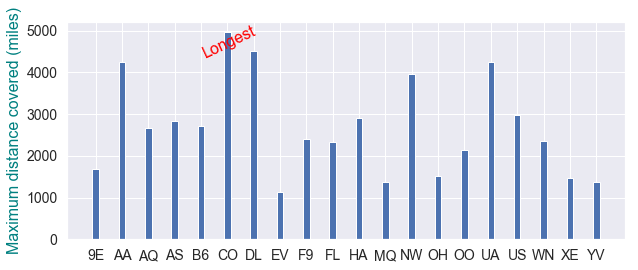

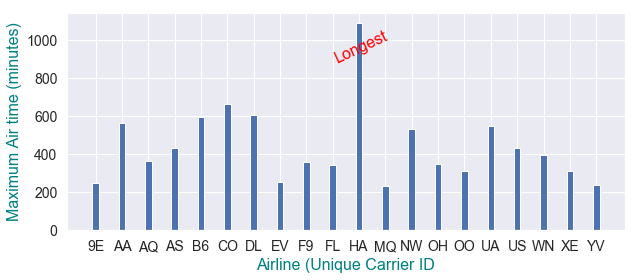

In [36]:
dist = data['Distance'].groupby(data['Airline']).max()
r1 = np.arange(len(dist))

plt.figure(figsize=(10, 4))

plt.bar(r1, dist, width=0.25)

#plt.xlabel('Airline (Unique Carrier ID', fontsize=16, color='teal')
plt.ylabel('Maximum distance covered (miles)', fontsize=16, color='teal')
plt.tick_params(axis='both', which='major', labelsize=14)
xtic = dist.index.values
plt.xticks([r for r in range(len(speed))], xtic)
plt.annotate("Longest", (4, 4900), fontsize=16, rotation = 25, color='red')
plt.show()

air = data['AirTime'].groupby(data['Airline']).max()
r1 = np.arange(len(air))

plt.figure(figsize=(10, 4))

plt.bar(r1, air, width=0.25)

plt.xlabel('Airline (Unique Carrier ID', fontsize=16, color='teal')
plt.ylabel('Maximum Air time (minutes)', fontsize=16, color='teal')
plt.tick_params(axis='both', which='major', labelsize=14)
xtic = air.index.values
plt.xticks([r for r in range(len(speed))], xtic)
plt.annotate("Longest", (9, 1000), fontsize=16, rotation = 25, color='red')
plt.show()

### **_Longest delay_**

Which flight has the most delay?

    Let's get this information by getting the information of the flight with the longest arrival delay (ArrDelay).

In [37]:
data.loc[data['ArrDelay'] == data['ArrDelay'].max()]

,Month,DayOfWeek,CRSDepTime,Airline,AirTime,ArrDelay,DepDelay,Origin,Destination,Distance,CancellationCode,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay,DepDate,AvgSpeed,Delay,FLstatus
322516,2,7,1820,NW,437,2461,2457,HNL,MSP,3972,N,1455,0,4,0,1002,2008-02-03,545,1,2


    The flight with the most delay, that of 41 hours (2461 minutes), is the one between "HNL" and "MSP", on February 3, 2008 operated by Airline "NW". The distance between these two airports is 3972 miles. Of this 41 hours delay, the previous flight's late arrival caused 16 hours and 42 minutes, carrier related delay was 24 hours and 15 minutes and National Air System Delay (NASDelay) caused 4 minutes.

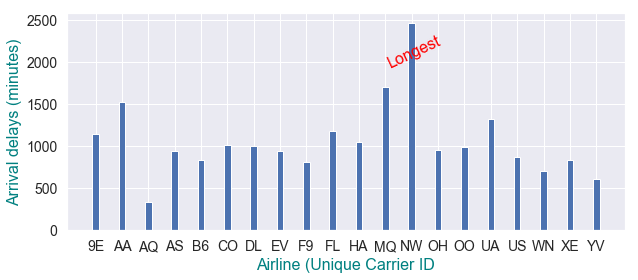

In [38]:
arr = data['ArrDelay'].groupby(data['Airline']).max()
r1 = np.arange(len(arr))

plt.figure(figsize=(10, 4))

plt.bar(r1, arr, width=0.25)

plt.xlabel('Airline (Unique Carrier ID', fontsize=16, color='teal')
plt.ylabel('Arrival delays (minutes)', fontsize=16, color='teal')
plt.tick_params(axis='both', which='major', labelsize=14)
xtic = arr.index.values
plt.xticks([r for r in range(len(arr))], xtic)
plt.annotate("Longest", (11, 2200), fontsize=16, rotation = 25, color='red')
plt.show()

## Exercise 3

Export the data set clean and with the new columns to Excel.

    The dataset is too large to export to excel, therefore, I will export it to csv. 

In [ ]:
#data.to_csv('../Data/FlightDelay_new.csv')  